In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Solutions to Problem 5

## 1. The 2-dimensional random walk
The following code simulates a 2-dimensional random walk with different probabilities to go N,S,E,W. You can play with these parameters and check that the Simple Random Walk (SRW) is quite different.

We modify the 2D simulation of the random walk in the Jupyter notebook slightly, so that instead
of moving North/South/East/West with equal probability, the random walker goes North or East
with probability .3,  and South or West with probability .2. 

**What do you think the path of the
random walk will like?**

As demonstrated in lecture, since the probability of going North/East is now greater than the probability of going South/West we have biased the walker to head in a direction. In this case, since the probability of moving North is equal to the probability of moving East we have biased the walker to head North-East. We thus expect that the path of the random walk will progress more towards the North-East Direction than in the symmetric random walk case.

**Do you think the new Markov chain will be recurrent?**

No. As stated in lecture, the asymmetric random walk will be transient. Some intution: the bias to head in the North-East direction means that after we have been walking for some long period of time the probability that we revisit zero is zero.

**Check by simulating
a few instances:**

Run the two blocks below a few times to demonstrate to yourself that the simulations agree with our answers above.

In [9]:
# probabilities for your 
# 2D random walk

[p_N, p_S, p_E, p_W] = [3/10, 2/10, 3/10, 2/10] # = [1/4,1/4,1/4,1/4] for the SRW

# number of steps of the walk
n_steps = 100000

# starting point
start = [0,0]

# run the walk
x = [start[0]]
y = [start[1]]
counter = 1
while counter < n_steps:
    U = np.random.rand()
    if 0 < U <= p_N:
        # going north
        x.append(x[-1] + 1) 
        y.append(y[-1])
    elif p_N < U <= p_N + p_S:
        # going south
        x.append(x[-1] - 1) 
        y.append(y[-1])
    elif p_N + p_S < U <= p_N + p_S+ p_E:
        # going east
        x.append(x[-1])
        y.append(y[-1]+1)
    else:
        # going west
        x.append(x[-1])
        y.append(y[-1]-1)
    counter += 1


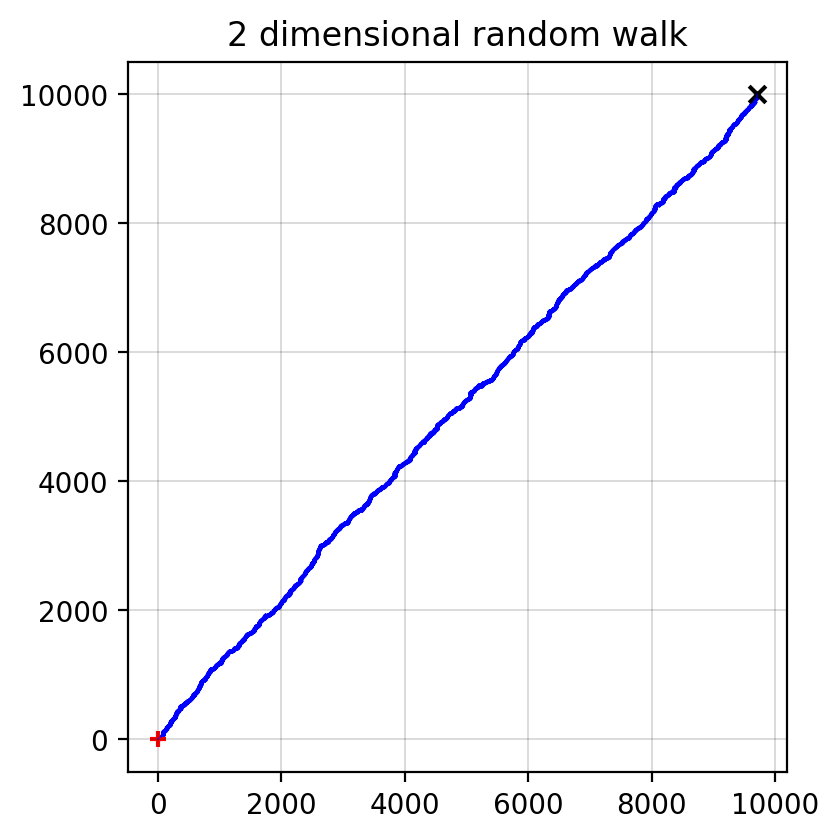

In [10]:
# Plot the 2D-path
fig = plt.figure(figsize=(4,4),dpi=200)
ax = fig.add_subplot(111)
plt.grid(color='black', linestyle='-', linewidth=0.1)
ax.scatter(y, x,c='blue',alpha=0.25,s=0.05);
ax.plot(y, x,c='blue',alpha=0.5,lw=0.25,ls='-');
ax.scatter(y[0], x[0],c='red', marker='+')
ax.scatter(y[-1], x[-1],c='black', marker='x')
plt.title('2 dimensional random walk')
plt.tight_layout(pad=0)

## 2. The 3-dimensional random walk


In [13]:
# 3D random walk 

# The walk is always transient
# in 3D except if transitions 
# probability are such that the 
# walk is in fact 
# only in 2D or 1D 
### Thus, we only look at SRW in 3D ###

# number of steps
n_steps = 10**3

# starting point
start = [0,0,0]

# run the walk
x = [start[0]]
y = [start[1]]
z = [start[2]]

counter = 1
while counter < n_steps:
    # choose a random direction  
    vec = np.random.randint(1,4)
    orient = np.random.randint(0,2)*2-1 ## = to -1 or 1 with proba 1/2
    if vec ==1:
        x.append(x[-1]+orient)
        y.append(y[-1])
        z.append(z[-1])
    if vec ==2:
        x.append(x[-1])
        y.append(y[-1]+orient)
        z.append(z[-1])
    else:
        x.append(x[-1])
        y.append(y[-1])
        z.append(z[-1]+orient)
    counter += 1

Text(0.5, 0.92, '3 dimensional random walk')

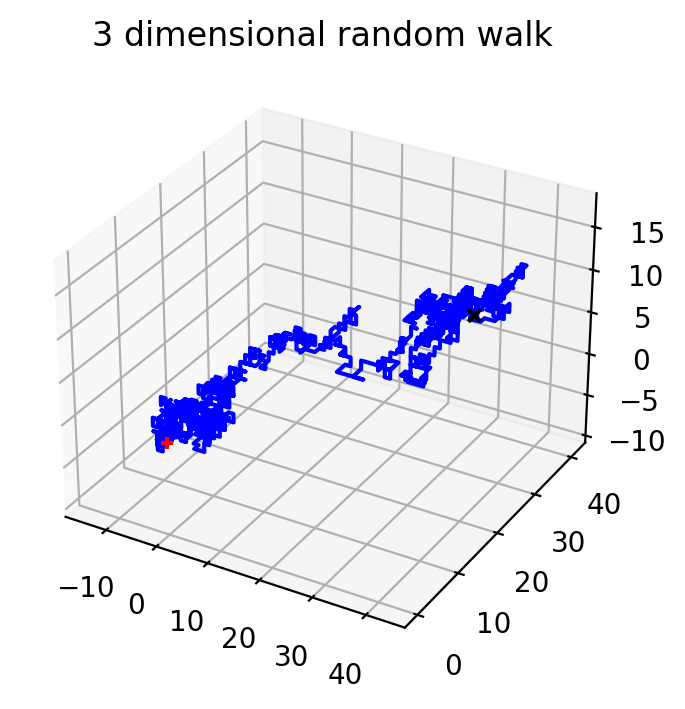

In [14]:
# Plotting the simulations
fig = plt.figure(figsize=(4,4),dpi=200)
ax = plt.axes(projection='3d')
ax.plot3D(z, y, x, 'blue')
ax.scatter(z[0],y[0], x[0],c='red', marker='+')
ax.scatter(z[-1],y[-1], x[-1],c='black', marker='x')
plt.title('3 dimensional random walk')

Hereafter is a function which allows you to compute the number of visits to zero for the three dimensional random walks.

In [20]:
def visits_to_zero_3d(n_simulations,n_steps):
    hist = {1:0} # Initialize the histogram as a dictionnary
    for i in range(n_simulations):
        # number of steps

        # starting point
        start = [0,0,0]

        # run the walk
        x = [start[0]]
        y = [start[1]]
        z = [start[2]]
        zero_count = 1 #you start at one so get +1 for free
        for j in range(n_steps):
            # choose a random direction  
            vec = np.random.randint(1,4)
            orient = np.random.randint(0,2)*2-1 ## = to -1 or 1 with proba 1/2
            if vec ==1: #choose a direction and then an orientation
                x.append(x[-1]+orient)
                y.append(y[-1])
                z.append(z[-1])
            if vec ==2:
                x.append(x[-1])
                y.append(y[-1]+orient)
                z.append(z[-1])
            else:
                x.append(x[-1])
                y.append(y[-1])
                z.append(z[-1]+orient)  
            zero_count += (x[-1]==y[-1]==z[-1]==0)
        if zero_count in hist:
                hist[zero_count] += 1
        else:
                hist[zero_count] = 1
    return hist

**Simulate a 3D simple random walk and count the total number of visits to 0. Simulate the walk $10^3$ times, each time running it for $10^3$ steps, and record how  many  times  the  walk  visited  0  in  each  case.  Plot  the  result  in  a  histogram.**

We do this is in the following block.

{1: 687, 2: 212, 4: 22, 3: 68, 6: 2, 5: 9}
the probability of returning at some time t>0 to zero p_0 is approximately  0.313


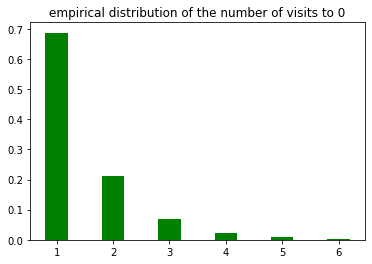

In [22]:
# Plotting the result of the function

n_simulations =10**3
n_steps=10**3

# Get the histogram
# and renormalize the probability distribution
hist = visits_to_zero_3d(n_simulations,n_steps)
print(hist)
total = sum(hist.values())
factor = 1/total

normalized_hist =  {key:value*factor for key,value in hist.items()}

return_proba = (n_simulations - hist[1])/n_simulations
print("the probability of returning at some time t>0 to zero p_0 is approximately ", return_proba)
plt.title('empirical distribution of the number of visits to 0')
plt.bar(list(normalized_hist.keys()), normalized_hist.values(), color='g', width=0.4)
plt.show()

**According to the computation from lecture, the distribution should be exponential – check that the histogram
decays exponentially, and use the data to estimate the return probability:**

We have estimate the return probability in the block above to be approximately 0.328.

Recall from lecture that we can describe the number of returns to 0 as a random variable:

$$N_0 = \# \{n \geq 0 \: | \: X_n = 0 \}. $$

In lecture we found that $N_0$ is distributed according to a geometric distribution, $N_0 \sim \text{Geom}(1-f_0)$, where $f_0$ is the probability of return to 0

$$f_0 = P(X_n = 0 \text{ for some } n>0 \: | \: X_0 = 0)$$

and hence we expect exponential decay in the value of $N_0$ as $m \to \infty$.

Let us demonstrate this with the following block (it's also fine if you just checked the decay at each point by hand):

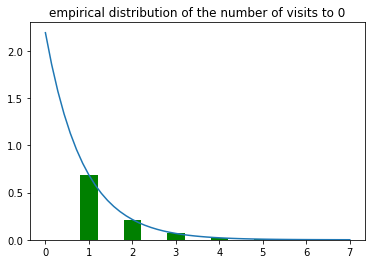

In [26]:
# Plotting the histogram
plt.title('empirical distribution of the number of visits to 0')
plt.bar(list(normalized_hist.keys()), normalized_hist.values(), color='g', width=0.4)


# Plotting the exponential decay curve
f0 = return_proba     # Use the estimate of the return probability from above
x = np.linspace(0, 7)
p_N0 = [(1-f0)*f0**(n-1) for n in x]  # Probability that N0 = n
plt.plot(x, p_N0)

plt.show()

It was shown a bit miraculously in 1992 by Borwein and Zucker that the mean of the expected number of returns to 0 (that we write $N_0$) for the SRW in 3 dimensions could be also be computed exactly. The formula is as follows:
\begin{align*}
        \mathbb{E}(N_0) = \frac{\sqrt3 -1}{32 \pi^3}\left[\Gamma(\frac{1}{24})\Gamma(\frac{11}{24})\right]^2 \simeq 1.516386...
\end{align*}
Where $\Gamma$ is the Euler gamma function.
This formula is very surprising and also very hard to prove and is only given here because it is remarkable. Of course, you do not have to remember it. However it allows to check if the empirical probability of returning to 0 is close to the theoretical one. Since we know from the lectures that 
\begin{align*}
    \mathbb{E}(N_0) = \frac{1}{1-p_0}.
\end{align*}
And thus that the return probability to 0 starting from 0, $p_0$, has approximate value
\begin{equation*}
    p_0 = 1-\frac{1}{\mathbb{E}(N_0)} \simeq  1-\frac{1}{1.516386} \simeq 0.34.
\end{equation*}

For 
n_simulations =10^3
n_steps=10^4, I obtained with the above program $p^{exp}_0 \simeq 0.339$ which is in accordance with the theory.

[1, 5, 4, 2, 3, 6, 7]


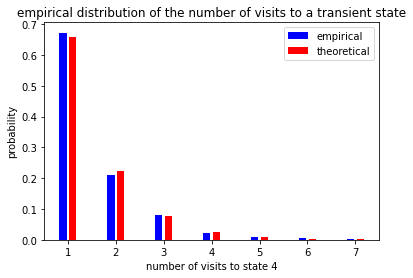

In [17]:
# Comparing the theory and the simulations
L = len(normalized_hist.keys())

# True probability of return
f_0 = 1-1/1.5168
true_hist = {}
for i in range(L):
    true_hist[i+1] = (1-f_0)*f_0**(i)

# Comparing the two histograms
plt.title('empirical distribution of the number of visits to a transient state')
plt.xlabel('number of visits to state 4')
plt.ylabel('probability')
print(list(normalized_hist.keys()))
plt.bar([x-0.1 for x in list(normalized_hist.keys())], normalized_hist.values(), color='b', width=0.15, label = 'empirical')
plt.bar([x+0.1 for x in list(true_hist.keys())], true_hist.values(), color='r', width=0.15, label="theoretical")
plt.legend()
plt.show()

## 3. Playing with the transition probabilities in a Markov chain
### Can you make the state '4' or '6' from Problem 1 - Week 2  a bit ""less"" transient?
We will be using the functions from the previous notebook.

In [29]:
## Defining a Markov Chain

class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        """
        Initialize the MarkovChain instance.
 
        Parameters
        ----------
        transition_matrix: 2-D array
            A 2-D array representing the probabilities of change of 
            state in the Markov Chain.
 
        states: 1-D array 
            An array representing the states of the Markov Chain. It
            needs to be in the same order as transition_matrix.
        """
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in 
                           range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in
                           range(len(self.states))}
 
    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.
 
        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
         self.states, 
         p=self.transition_matrix[self.index_dict[current_state], :]
        )
 
    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.
 
        Parameters
        ----------
        current_state: str
            The state of the current random variable.
 
        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

Some useful functions explained and coded below

In [38]:
def run_simulations_markov_chain(markov_chain, nrealizations, nsteps, initial_state):
    sim_arr = np.zeros((nsteps, nrealizations))

    #Running many realizations
    for r in range(nrealizations):
        simulation= markov_chain.generate_states(current_state=initial_state, 
                                              no=nsteps)  
        sim_arr[:, r] = np.array(simulation)
    return sim_arr

def state_statistics(markov_chain, nrealizations, nsteps, initial_state):
    # Return the empirical probability of return and
    # the number of visits of some state 
    # starting from that state. 
    # This is only interesting when the state is transient.
    
    
    # Get the simulation results
    sim_arr = run_simulations_markov_chain(markov_chain, nrealizations, nsteps, initial_state)
    #Here we "call" i the transient initial_state
    N_i = 0
    f_i = 0

    hist = {1:0} # Initialize the histogram as a dictionnary
    sim_arr_transpose = np.transpose(sim_arr)
    for x in sim_arr_transpose:
        occurences_i = np.count_nonzero(x == int(initial_state))# If occurences is 0 then the state is not re-visited
        N_i = N_i + 1 + occurences_i # Add 1 to take into account the intial step X_0 = i
        does_return = (occurences_i>0) 
        f_i = f_i + does_return
        
        if 1+occurences_i in hist:
            hist[1+occurences_i] += 1
        else:
            hist[1+occurences_i] = 1
    return [N_i/nrealizations, f_i/nrealizations, hist]

**Modify the Markov chain in the Jupyter notebook by adding .1 to an entry in the first row, and
subtracting .1 from another entry in the first row.**

We modify the first Markov chain implemented (with corresponding transition matrix M_1) is the block below

In [39]:
#Initialising our Markov chain

# We first copy the transition matrix from Problem 1 - Week 2
# and give some modifications to it

M_1 =[[1/2, 1/2, 0, 0, 0, 0], 
    [1/2, 1/2, 0, 0, 0, 0],
    [0, 0, 1/2, 0, 1/2, 0],
    [1/4, 1/4, 0, 0, 1/4, 1/4],
    [0, 0, 1/2, 0, 1/2, 0],
    [0, 1/3, 0, 1/3, 1/3, 0]]

M_1_new = [[1/2 + 0.1, 1/2 - 0.1, 0, 0, 0, 0], 
           [1/2, 1/2, 0, 0, 0, 0],
           [0, 0, 1/2, 0, 1/2, 0],
           [1/4, 1/4, 0, 0, 1/4, 1/4],
           [0, 0, 1/2, 0, 1/2, 0],
           [0, 1/3, 0, 1/3, 1/3, 0]]
# Above is the original matrix but you can change it a bit 
# Try to make the transient states "less" transient


**How do you think this will affect the limiting
probabilities for being in all three states?  (Which ones will increase, which will decrease, and which
will stay the same?)  Check by running the code to count the total number of visits to each state.**

Note that the question incorrectly says there are three states in the Markov Chain implemented when in fact there are six. 

We have modified the transition matrix to increase $P_{11}$ by $0.1$ and decrease $P_{12}$ by $0.1$. Let $\pi_j$ denote the limiting probability of being in state $j$.

We predict that that the limiting probabilities will change as follows:

- $\pi_1$ will increase since we have increased the probability of transitioning from state 1 to itself.
- $\pi_2$ will decrease since we have decreased the probability of transitioning from state 1 to state 2.
- $\pi_3, \pi_4, \pi_5$ and $\pi_6$ will stay the same (i.e. we have made no impact) since there are no edges leaving from the class $\{1, 2\}$  and going to the rest of the states.


Recalling the following result from lecture

$$ \pi_j = \lim_{n \to \infty} \frac{\# \text{ of visits to j by time } n}{n}, $$

we can try to check our predictions by observing the total number of visits to state $j$ for $j = 1, 2, \ldots, 6$, keeping in mind that since we are only walking for a finite number of steps $n$, and thus we are only seeing an estimate the the total number of visits (I recommend running the blocks a few times and keeping track of the changes which show up consistently to see the robust trends in these estimates):

In [63]:
states=['1', '2', '3', '4', '5', '6'] #Name your states here
nrealizations = 10^3
nsteps = 100

# Initialize a dictionary for storing the statistics of each state for each of the two chains
statistics_1 = dict(zip(states, np.zeros(len(states))))
statistics_2 = dict(zip(states, np.zeros(len(states))))

for i in states:
    # Compute the probability of returning 
    # at some point to state i when starting 
    # from state i.
    initial_state = i

    # Get its statistics

    #For the first matrix
    markov_chain_1 = MarkovChain(transition_matrix=M_1, states=states)
    statistics_1[i] = state_statistics(markov_chain_1, nrealizations, nsteps, initial_state)

    #For the new matrix
    markov_chain_2 = MarkovChain(transition_matrix=M_1_new, states=states)
    statistics_2[i] = state_statistics(markov_chain_2, nrealizations, nsteps, initial_state)
    

In [64]:
# Print the average number of visits to each state for the different matrices 
for i in states:
    print("For the first matrix :")
    print("The empirical average number of visits to " + i + 
          " starting from " + i + " is", statistics_1[i][0])
    print("---------------------------------------------------------------------")


    print("For the new matrix :")
    print("The empirical average number of visits to " + i + 
          " starting from " + i + " is", statistics_2[i][0])
    print("---------------------------------------------------------------------")

For the first matrix :
The empirical average number of visits to 1 starting from 1 is 49.888888888888886
---------------------------------------------------------------------
For the new matrix :
The empirical average number of visits to 1 starting from 1 is 56.888888888888886
---------------------------------------------------------------------
For the first matrix :
The empirical average number of visits to 2 starting from 2 is 50.0
---------------------------------------------------------------------
For the new matrix :
The empirical average number of visits to 2 starting from 2 is 44.44444444444444
---------------------------------------------------------------------
For the first matrix :
The empirical average number of visits to 3 starting from 3 is 52.55555555555556
---------------------------------------------------------------------
For the new matrix :
The empirical average number of visits to 3 starting from 3 is 50.111111111111114
------------------------------------------

Running the two blocks above a few times the expected trends are clear for states $1$ and $2$, and as expected there is no robust trend for the other states. Studying the transition diagram is a good way to further convince yourself of these trends!